In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Only 1% of women at age forty who participate in a routine mammography test have breast cancer.

80% of women who have breast cancer will get positive mammographies, but 9.6% of women who don’t have breast cancer will also get positive mammographies.

A woman of this age had a positive mammography in a routine screening. What is the probability that she actually has breast cancer?

In [2]:
prior = .01
event = (0.99*0.096) + (0.01*0.8) # positive mammography
probability_of_event_given_prior_is_true = .8

posterior =\
(probability_of_event_given_prior_is_true * prior)/event

posterior

0.07763975155279504

A cancer affects 1% of the population.

Among people with the cancer, the test comes back positive 90% of the time.

Among people without the cancer, the test comes back positive 10% of the time.

If you get a positive test, what's the probability you have cancer?

In [4]:
prior = .01
event = (.01*.9)+(.99*.1)
probability_of_event_given_prior_is_true = .9

posterior =\
(probability_of_event_given_prior_is_true * prior)/event

posterior

0.08333333333333333

What about if you get a negative test? What's the probability you're cancer-free?

In [5]:
prior = .99
event = (0.99*0.90) + (0.01*0.1) # negative test
probability_of_event_given_prior_is_true = .9

posterior =\
(probability_of_event_given_prior_is_true * prior)/event

posterior

0.9988789237668162

100 out of 10,000 women at age forty who participate in routine screening have breast cancer. 80 of every 100 women with breast cancer will get a positive mammography. 950 out of 9,900 women without breast cancer will also get a positive mammography. If 10,000 women in this age group undergo a routine screening, about what fraction of these women with positive mammographies will actually have breast cancer?

In [6]:
prior = .01
event = (0.01 * 80/100) + (0.99 * 950/9900)
probability_of_event_given_prior_is_true = .8

posterior = (probability_of_event_given_prior_is_true * prior)/event

posterior

0.07766990291262135

Now, to clean up the formula...

In [7]:
prior = .01
probability_of_event_given_prior_is_true = 80/100
probability_of_event_given_prior_is_NOT_true = 950/9900

true_positive = probability_of_event_given_prior_is_true * prior
false_positive = probability_of_event_given_prior_is_NOT_true * (1-prior)

posterior =\
(true_positive)/\
(true_positive + false_positive)

posterior

0.07766990291262138

# Pearls

Suppose that a barrel contains many small plastic eggs. Some eggs are painted red and some are painted blue. 40% of the eggs in the bin contain pearls, and 60% contain nothing. 30% of eggs containing pearls are painted blue, and 10% of eggs containing nothing are painted blue. What is the probability that a blue egg contains a pearl?

In [13]:
# Eggs containing pearls
prior = .40

# Of those with pearls, which ones are blue?
probability_of_event_given_prior_is_true = .3

# Of those without pearls, which ones are blue?
probability_of_event_given_prior_is_NOT_true = .1

true_positive = probability_of_event_given_prior_is_true * prior
false_positive = probability_of_event_given_prior_is_NOT_true * (1-prior)

posterior =\
(true_positive)/\
(true_positive + false_positive)

posterior

0.6666666666666666

In [8]:
p_of_a = .01
p_of_b_given_a = 80/100
p_of_b_given_NOT_a = 950/9900

# Probability of a positive test given you're sick
true_positive = p_of_b_given_a * p_of_a

# Probability of a positive test given you're NOT sick
false_positive = p_of_b_given_NOT_a * (1 - p_of_a)

# Probability that you're NOT sick
p_of_NOT_a = 1 - p_of_a

# Probability of a negative test
p_of_NOT_b = 1 - (true_positive + false_positive)

# Probability of a negative test given you're NOT sick
p_of_NOT_b_given_NOT_a = 1 - p_of_b_given_NOT_a
true_negative = p_of_NOT_b_given_NOT_a

# Probability of a negative test given you're sick
false_negative = 1 - true_negative - true_positive - false_positive
p_of_NOT_b_given_a = false_negative
# (I solved this one the other way around)

# [P(~B|~A) x P(~A)] / P(~B)

posterior_pos =\
(true_positive)/\
(true_positive + false_positive)

posterior_neg =\
(true_negative)/\
(true_negative + false_negative)

false_negative + true_negative + false_positive + true_positive

1.0

Notice that Bayes' Theorem is just saying "What's the probability that **A** is true, given all the universes in which **B** happened?"

Let's turn it into a function...

In [9]:
def bayes(prior, b_given_a, b_given_NOT_a):
    prior = prior
    probability_of_event_given_prior_is_true = b_given_a
    probability_of_event_given_prior_is_NOT_true = b_given_NOT_a

    true_positive = probability_of_event_given_prior_is_true * prior
    false_positive = probability_of_event_given_prior_is_NOT_true * (1-prior)
    
    posterior =\
    (true_positive)/\
    (true_positive + false_positive)

    return posterior

In [10]:
def count_bayes(prior, b_given_a, b_given_NOT_a, thresh=0.99):
    
    progression = [prior]
    count = 0
    while ((prior < thresh) and (prior > 1 - thresh)) or count == 0:
        prior = bayes(prior, b_given_a, b_given_NOT_a)
        progression.append(prior)
        count += 1

    return pd.Series(progression)

Bob is 90% sure he's not a scoundrel, but his dating life hasn't been going so well! How many rejections should get get before he changes his opinion and he's 99% sure he IS a scoundrel?

Here are the probabilities I assign to the problem. Of course, this is pretty subjective.

- Prior: 10%
- Rejection rate if he IS a scoundrel: 95%
- Rejection rate if he is NOT a scoundrel: 75%

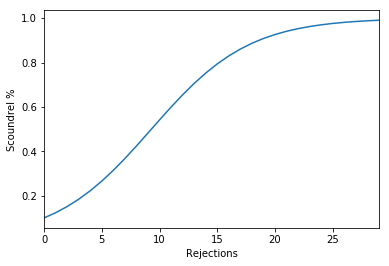

In [11]:
scoundrel = count_bayes(.10, .95, .75)

scoundrel.plot()
plt.xlabel('Rejections')
plt.ylabel('Scoundrel %')

Wow, it would take about 30 rejections for him to be justified in changing his mind!

Now let's say Bob meets Alice and they hit it off. But a week later, she doesn't return a text message. Bob doesn't panic, but then she doesn't return a text the next day either.

How many ignored texts should Bob send before he "takes the hint"?

- **Prior that Alice likes Bob: 90%** (They had a great date!)
- **Probability of an ignored text if she likes him: 20%** (People get busy sometimes.)
- **Probability of an ignored text if she doesn't like him: 60%** (Even if she doesn't like him, there's a good chance she'd text him to let him know.)

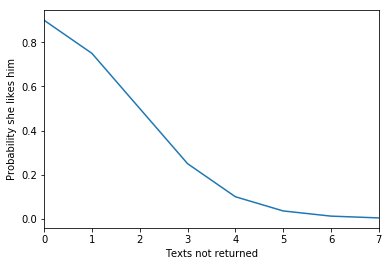

In [12]:
texts = count_bayes(.90, .20, .60)

texts.plot()
plt.xlabel('Texts not returned')
plt.ylabel("Probability she likes him")

In [78]:
My advice to Bob would be 3 texts

0.6666666666666666